In [1]:
#Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import scipy.cluster.hierarchy as sch

In [3]:
#Import heart disease dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data=pd.read_csv(url, header=None, names=column_names)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
#Checking for missing values
data.replace("?", pd.NA, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [7]:
#Replace missing values
for column in data.columns:
    if data[column].isnull().sum()>0:
        if data[column].dtype in ['float64', 'int64']:
            data[column].fillna(data[column].mean(), inplace=True)
        else:
            data[column].fillna(data[column].mode()[0], inplace=True)

C:\Users\sepdo\AppData\Local\Temp\ipykernel_23644\4112665907.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [9]:
#Check again for missing values
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [11]:
#Display
print("\nDataset head after cleaning:")
print(data.head())


Dataset head after cleaning:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  


In [13]:
#Creating a seperate table for the class embedded in the data
class_table = data[['num']].copy()
data_without_class = data.drop('num', axis=1)
print("Class Table:")
print(class_table.head())

Class Table:
   num
0    0
1    2
2    1
3    0
4    0


In [15]:
#Display dataset without the class column
print("\nDataset without Class Column:")
print(data_without_class.head())


Dataset without Class Column:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  
0    3.0  0.0   6.0  
1    2.0  3.0   3.0  
2    2.0  2.0   7.0  
3    3.0  0.0   3.0  
4    1.0  0.0   3.0  


In [17]:
#Correlation matrices to identify highly correlated features with the target variable (or other features)
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['num'].sort_values(ascending=False)
print("Correlation with 'num':")
print(correlation_with_target)
#features with perfect correlation
redundant_features = correlation_with_target[correlation_with_target.abs() > 0.95].index.tolist()

Correlation with 'num':
num         1.000000
ca          0.517390
thal        0.508799
oldpeak     0.504092
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
thalach    -0.415040
Name: num, dtype: float64


In [19]:
#'num' is perfect so we remove it from the list
if 'num' in redundant_features:
    redundant_features.remove('num')
#Check again
print("\nRedundant Features (highly correlated with target):", redundant_features)


Redundant Features (highly correlated with target): []


In [21]:
#Drop redundant features from the dataset
if redundant_features:
    data.drop(columns=redundant_features, inplace=True)
#remove low-variance feature, because they dont contribute at all
low_variance_features = [col for col in data.columns if data[col].nunique() <= 1]
print("\nLow-Variance Features:", low_variance_features)


Low-Variance Features: []


In [23]:
#Drop low-variance features
if low_variance_features:
    data.drop(columns=low_variance_features, inplace=True)
#Display final result
print("\nFeatures after cleaning:")
print(data.head())


Features after cleaning:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  


Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std

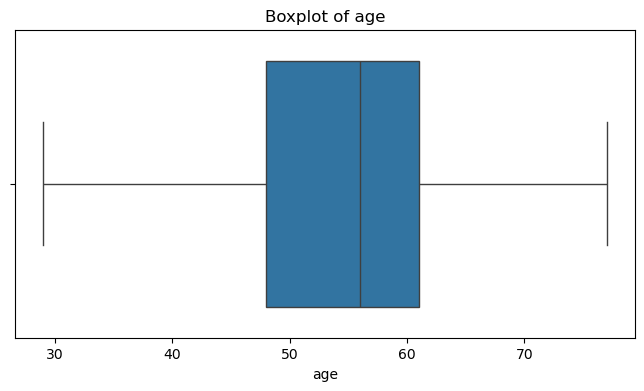

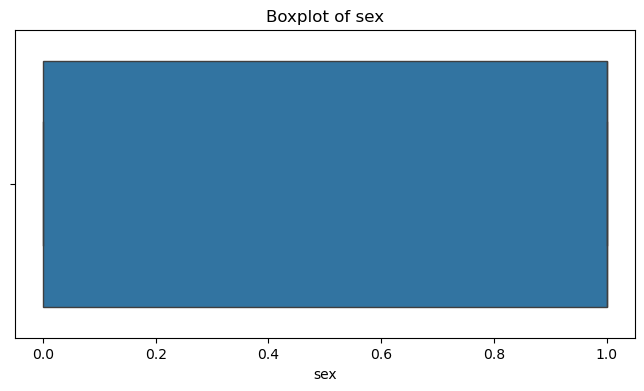

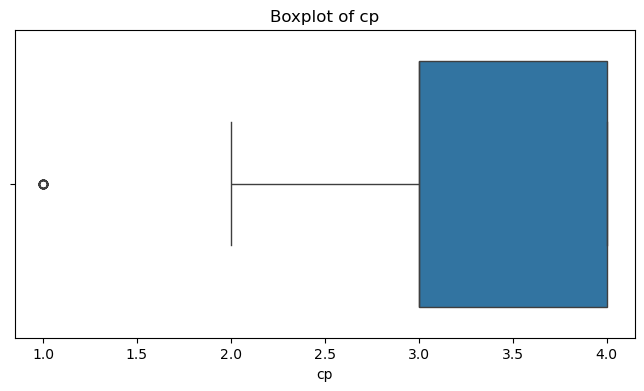

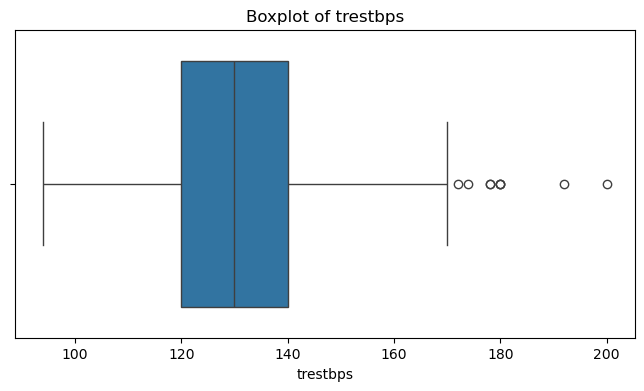

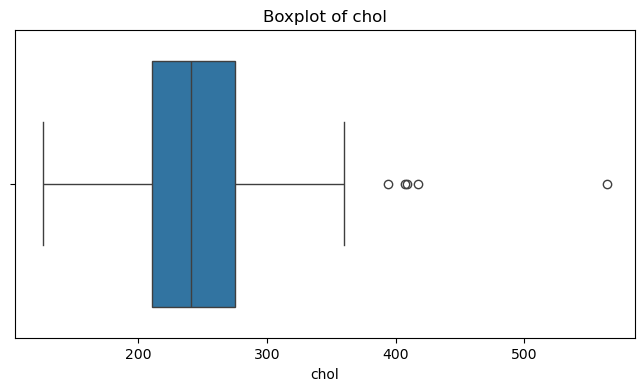

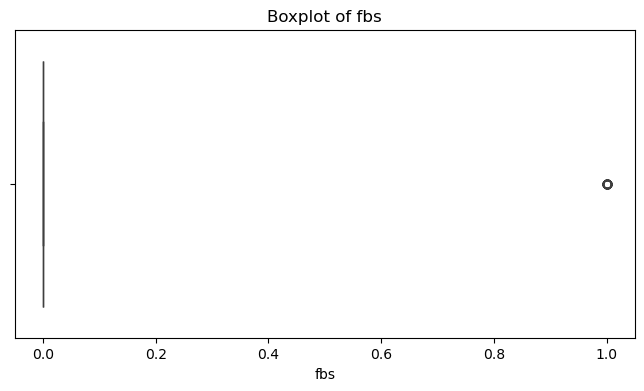

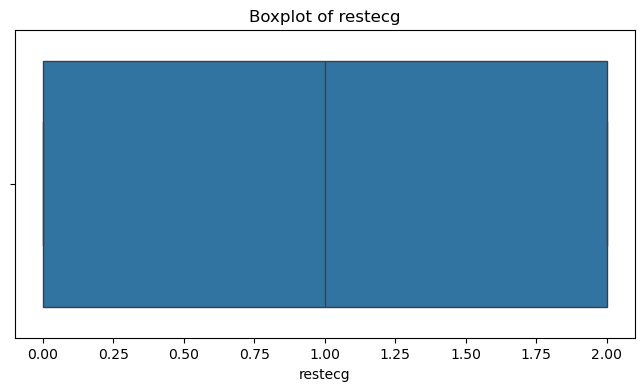

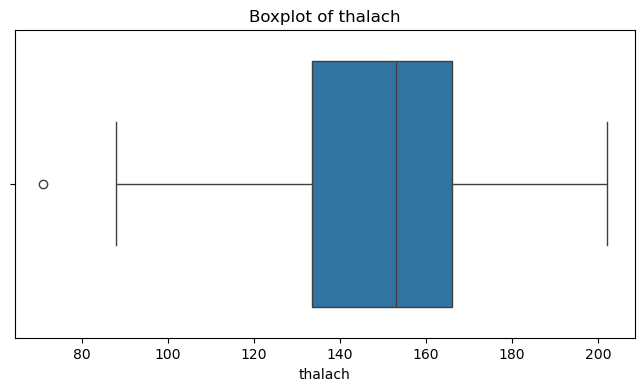

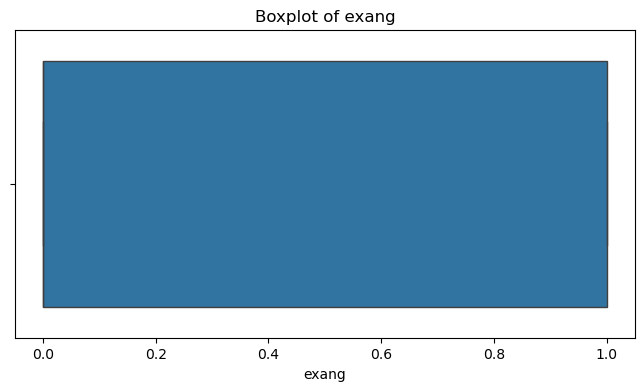

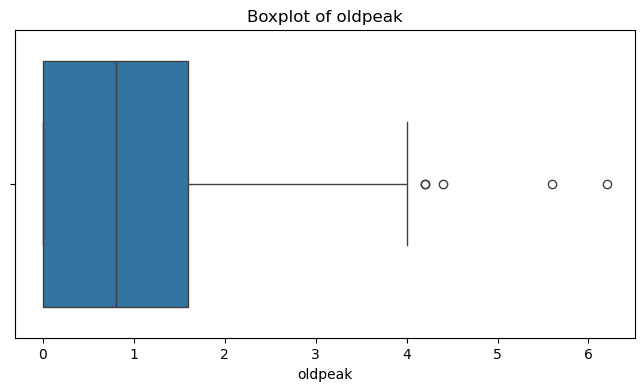

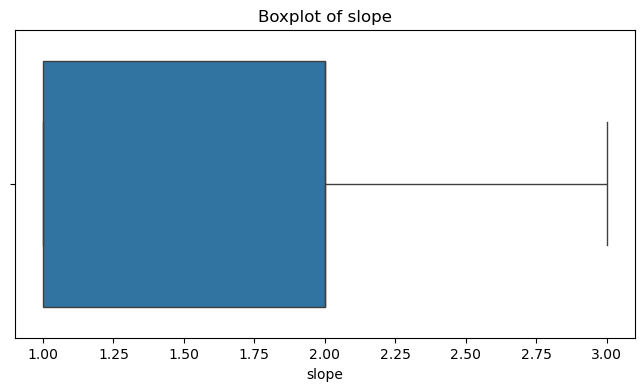

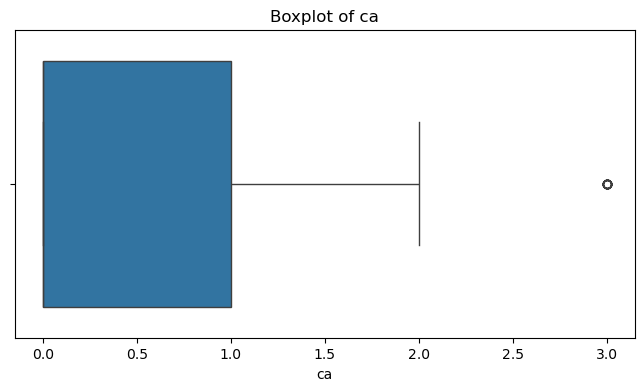

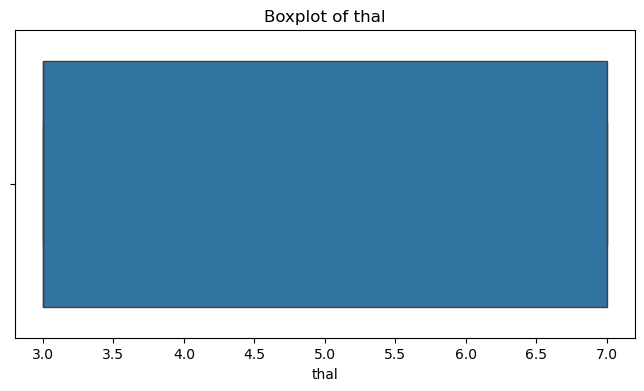

In [25]:
#Descriptive statistics
print("Descriptive Statistics:")
print(data.describe())

#Boxplots for features
for column in data.columns:
    if column != 'num':  # Exclude the target variable
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

In [27]:
#Removing outliners with IQR method
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
data_no_outliers=data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

print("Original dataset:", data.shape)
print("Dataset shape after removing outliers:", data_no_outliers.shape)

Original dataset: (303, 14)
Dataset shape after removing outliers: (216, 14)


In [29]:
#Normalize and standarize data
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data_no_outliers)
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(data_no_outliers)

data_normalized = pd.DataFrame(data_normalized, columns=data_no_outliers.columns)
data_standardized = pd.DataFrame(data_standardized, columns=data_no_outliers.columns)

print("\nSample of normalized data:")
print(data_normalized.head())
print("\nSample of standardized data:")
print(data_standardized.head())


Sample of normalized data:
        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.808511  1.0  1.0  0.342105  0.427948  0.0      1.0  0.359649    1.0   
1  0.170213  1.0  0.5  0.473684  0.519651  0.0      0.0  0.868421    0.0   
2  0.255319  0.0  0.0  0.473684  0.318777  0.0      1.0  0.736842    0.0   
3  0.574468  1.0  0.0  0.342105  0.458515  0.0      0.0  0.789474    0.0   
4  0.702128  0.0  1.0  0.605263  0.598253  0.0      1.0  0.631579    0.0   

   oldpeak  slope   ca  thal   num  
0    0.650    0.5  1.0   1.0  0.25  
1    0.875    1.0  0.0   0.0  0.00  
2    0.350    0.0  0.0   0.0  0.00  
3    0.200    0.0  0.0   0.0  0.00  
4    0.900    1.0  1.0   0.0  0.75  

Sample of standardized data:
        age       sex        cp  trestbps      chol  fbs   restecg   thalach  \
0  1.514484  0.714485  0.888898 -0.558417 -0.317124  0.0  1.092218 -0.968809   
1 -1.789845  0.714485 -0.391115  0.116558  0.149610  0.0 -0.924185  1.616332   
2 -1.349268 -1.399609 -

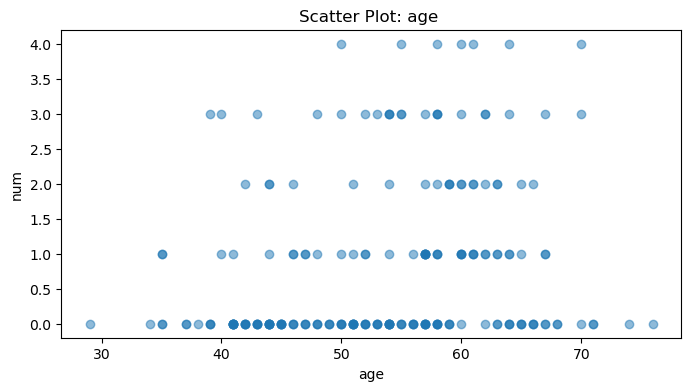

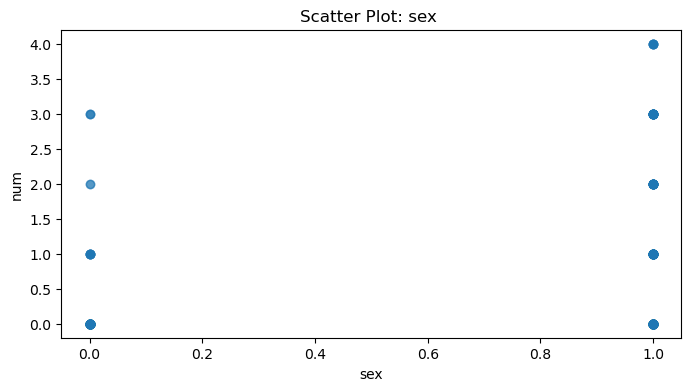

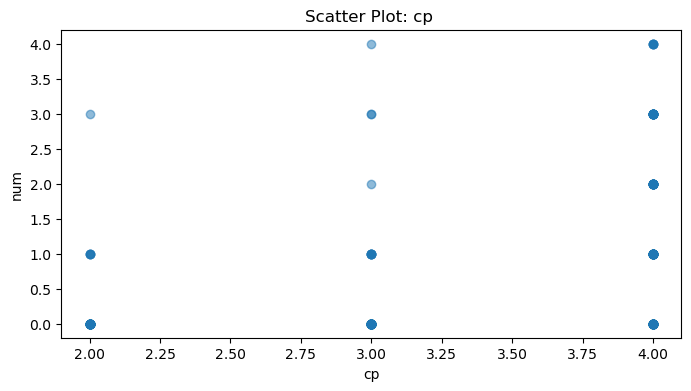

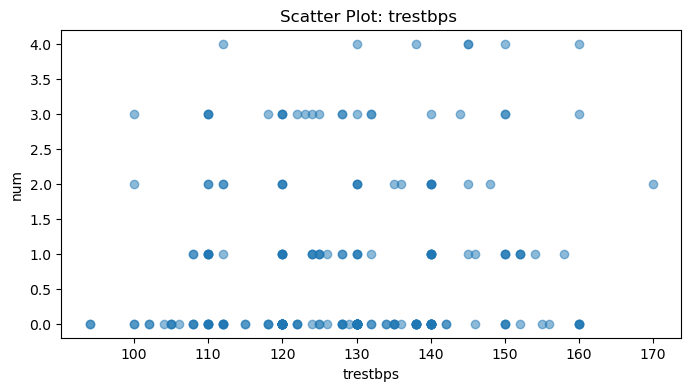

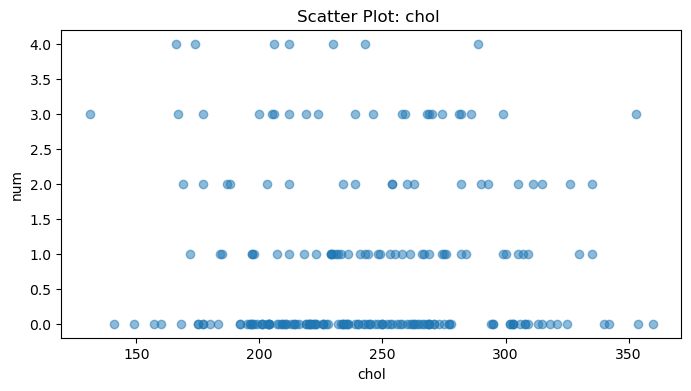

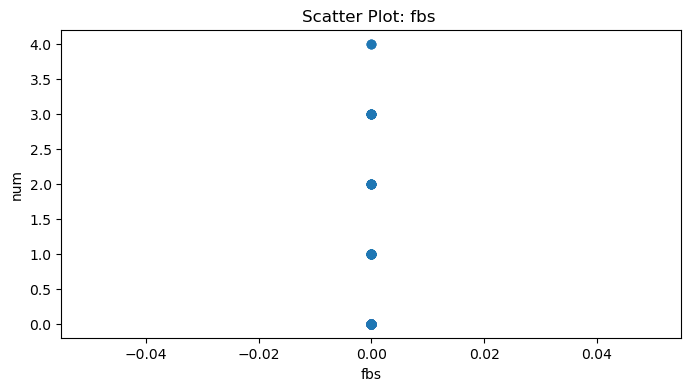

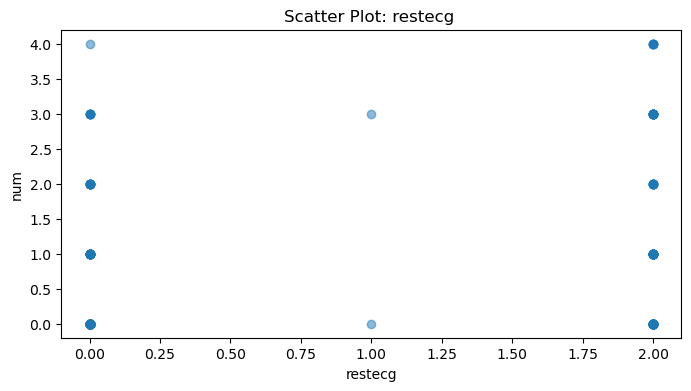

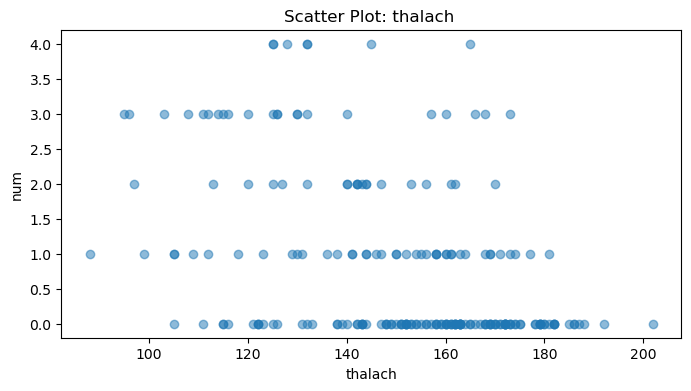

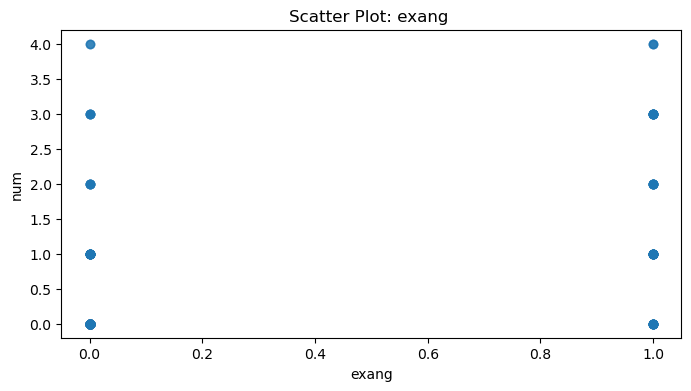

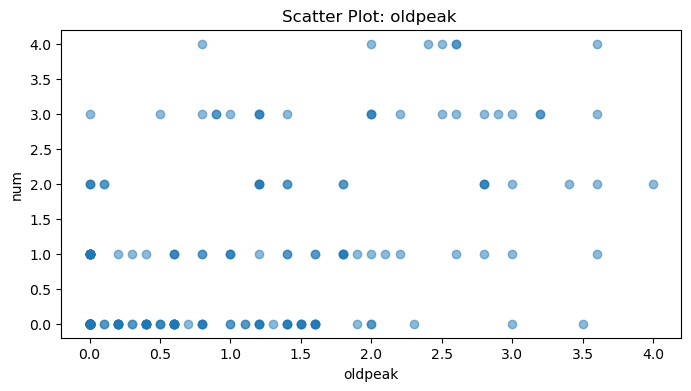

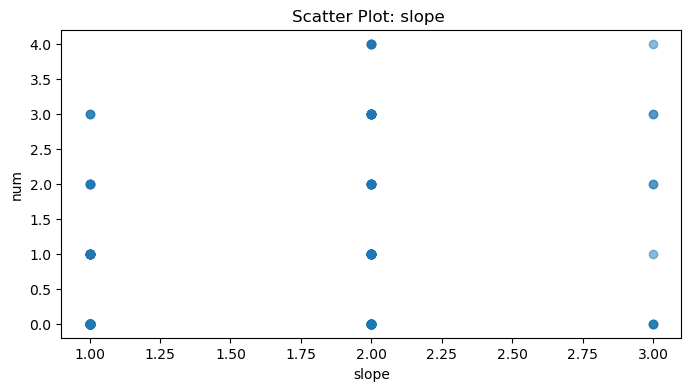

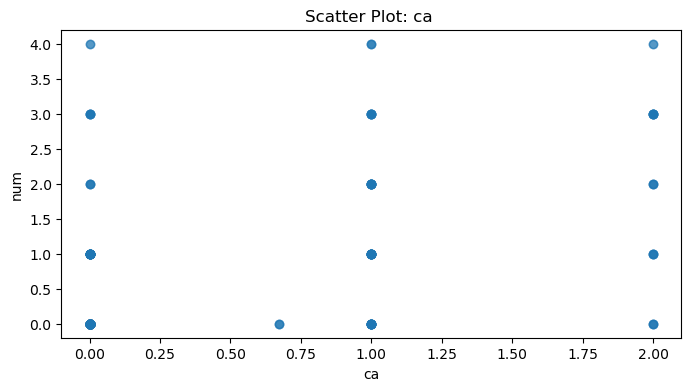

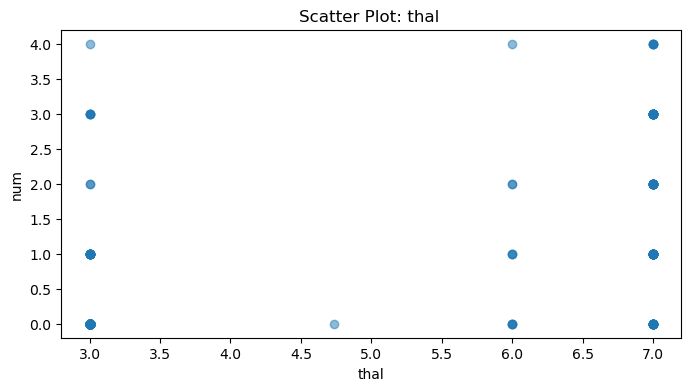

In [31]:
#creating scatter plots to show data *not showing target column 'num'*
for column in data_no_outliers.columns:
    if column != 'num':
        plt.figure(figsize=(8, 4))
        plt.scatter(data_no_outliers[column], data_no_outliers['num'], alpha=0.5)
        plt.title(f'Scatter Plot: {column} ')
        plt.xlabel(column)
        plt.ylabel('num')
        plt.show()

In [33]:
#We look for the best feautures using ANOVA F-statistic method
X = data_no_outliers.drop('num', axis=1)
y = data_no_outliers['num']

best_features = SelectKBest(score_func=f_classif, k='all').fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': best_features.scores_})
feature_scores.sort_values(by='Score', ascending=False, inplace=True)

print("\nFeature Importance Scores:")
print(feature_scores)


Feature Importance Scores:
     Feature      Score
12      thal  31.115592
9    oldpeak  23.331539
11        ca  18.842283
2         cp  16.544298
7    thalach  15.011882
8      exang  14.676011
10     slope   9.753205
1        sex   7.851733
0        age   3.845101
6    restecg   3.099709
3   trestbps   1.655641
4       chol   1.190406
5        fbs        NaN


C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [35]:
#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTraining set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (151, 13)
Test set: (65, 13)


In [37]:
def split_data(X, y, test_size):
    return train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

linear_clf = LogisticRegression(max_iter=1000)
quad_clf = LogisticRegression(max_iter=1000)
nb_clf = GaussianNB()

#linear, quadratic, Naïve Bayes classifier training
def evaluate_classifiers(X_train, X_test, y_train, y_test):
    #Linear
    linear_clf.fit(X_train, y_train)
    y_pred_linear = linear_clf.predict(X_test)

    #Quadratic
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_quad = poly.fit_transform(X_train)
    X_test_quad = poly.transform(X_test)
    quad_clf.fit(X_train_quad, y_train)
    y_pred_quad = quad_clf.predict(X_test_quad)

    #Naïve Bayes
    nb_clf.fit(X_train, y_train)
    y_pred_nb = nb_clf.predict(X_test)

    results = {
        "Linear": classification_report(y_test, y_pred_linear, output_dict=True),
        "Quadratic": classification_report(y_test, y_pred_quad, output_dict=True),
        "Naive Bayes": classification_report(y_test, y_pred_nb, output_dict=True),
    }

    return results

In [39]:
#Seperating data with multiple ways (80-20, 90-10)
splits = [0.2, 0.1]
results_by_split = {}

for test_size in splits:
    #Split data
    X_train, X_test, y_train, y_test = split_data(X, y, test_size)
    results_by_split[f"{int((1-test_size)*100)}-{int(test_size*100)}"] = evaluate_classifiers(X_train, X_test, y_train, y_test)

for split, results in results_by_split.items():
    print(f"\nResults for {split} split:")
    for model, metrics in results.items():
        print(f"{model} Accuracy: {metrics['accuracy']:.4f}")

C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Results for 80-20 split:
Linear Accuracy: 0.5909
Quadratic Accuracy: 0.5455
Naive Bayes Accuracy: 0.4773

Results for 90-10 split:
Linear Accuracy: 0.7273
Quadratic Accuracy: 0.5000
Naive Bayes Accuracy: 0.5000


C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [41]:
#10-fold Cross validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
linear_scores = cross_val_score(linear_clf, X, y, cv=skf, scoring='accuracy')
nb_scores = cross_val_score(nb_clf, X, y, cv=skf, scoring='accuracy')

#for quadratic we need polynomial transformation
quad_scores = []
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_quad = poly.fit_transform(X_train)
    X_test_quad = poly.transform(X_test)
    quad_clf.fit(X_train_quad, y_train)
    quad_scores.append(quad_clf.score(X_test_quad, y_test))

print("\n10-Fold Cross-Validation Results:")
print(f"Linear Classifier Mean Accuracy: {linear_scores.mean():.4f}")
print(f"Quadratic Classifier Mean Accuracy: {sum(quad_scores)/len(quad_scores):.4f}")
print(f"Naive Bayes Mean Accuracy: {nb_scores.mean():.4f}")

C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/s


10-Fold Cross-Validation Results:
Linear Classifier Mean Accuracy: 0.6342
Quadratic Classifier Mean Accuracy: 0.6158
Naive Bayes Mean Accuracy: 0.5418


C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

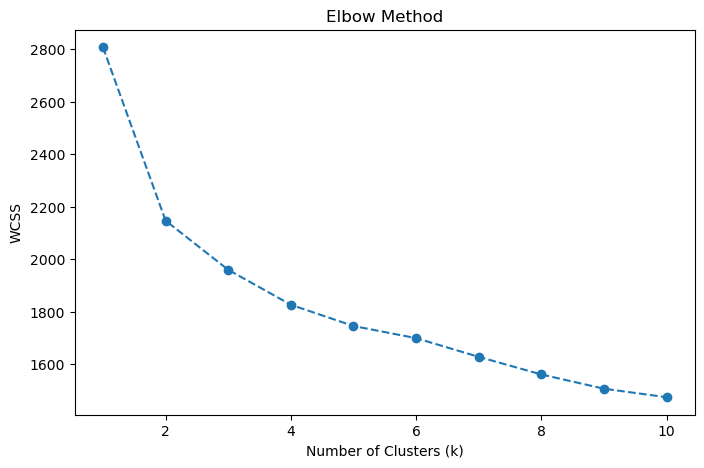

In [43]:
#Elbow Method
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_standardized)
    wcss.append(kmeans.inertia_)

#display the figure
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

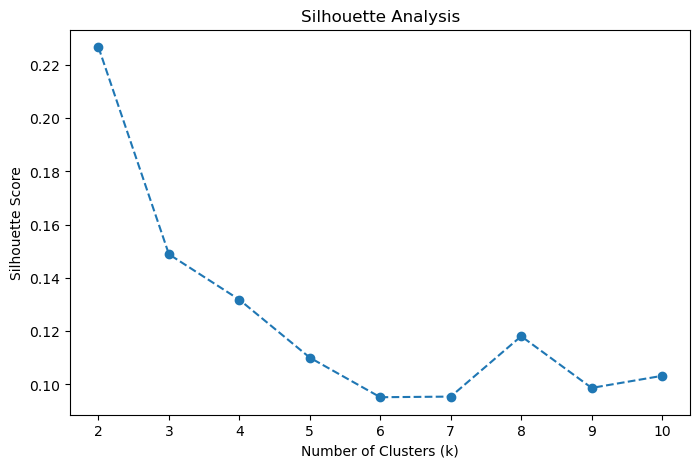

In [45]:
#Silhouette Analysis
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_standardized)
    silhouette_scores.append(silhouette_score(data_standardized, labels))

#display the figure
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Analysis")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [47]:
#From the plots: Elbow Method:Look for the "elbow" point where the WCSS decrease slows significantly.Silhouette Analysis:Choose k with the highest silhouette score   k is 2


C:\Users\sepdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


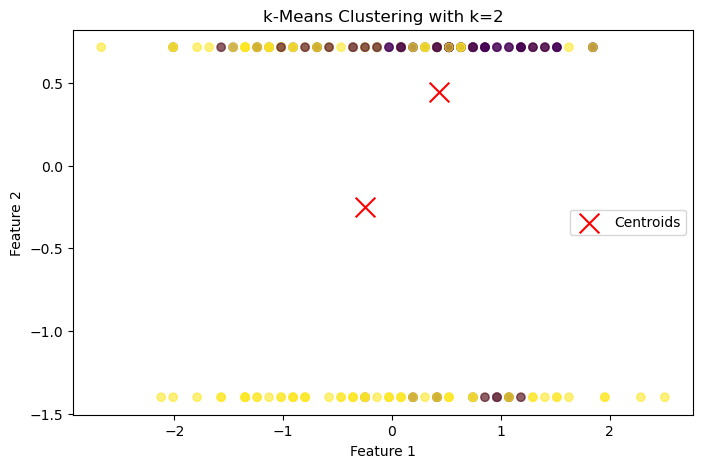

In [49]:
#Deploy k-means
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_standardized['Cluster'] = kmeans.fit_predict(data_standardized)

#Visualize clusters
plt.figure(figsize=(8, 5))
plt.scatter(data_standardized.iloc[:, 0], data_standardized.iloc[:, 1],
            c=data_standardized['Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='x', label='Centroids')
plt.title(f"k-Means Clustering with k={optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

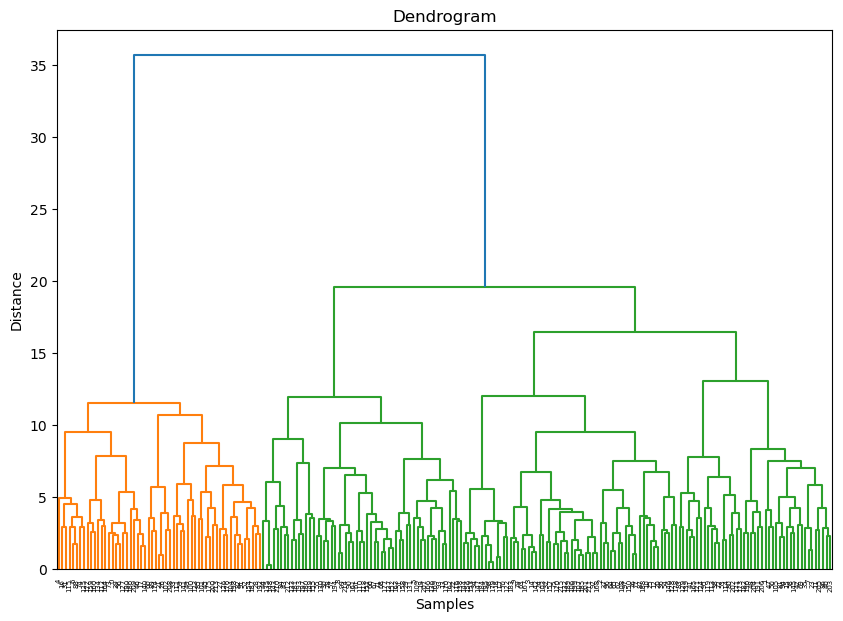

In [51]:
#Dendrogram
plt.figure(figsize=(10, 7))
linkage_matrix = sch.linkage(data_standardized, method='ward')
dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [53]:
#From dendrogram we see that the optimal number of clusters is 2


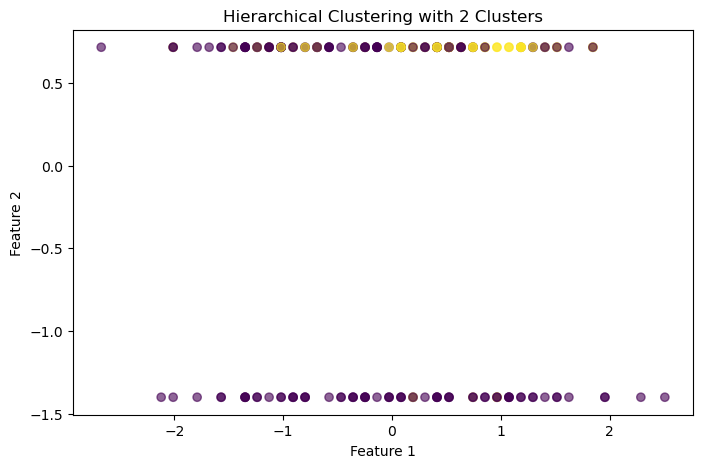

In [61]:
# Deploy Hierarchical clustering
optimal_clusters = 2
hc = AgglomerativeClustering(
    n_clusters=optimal_clusters,
    linkage='ward'
)

data_standardized['Cluster_HC'] = hc.fit_predict(data_standardized)

# Visualize clusters for the first two features
plt.figure(figsize=(8, 5))
plt.scatter(
    data_standardized.iloc[:, 0],
    data_standardized.iloc[:, 1],
    c=data_standardized['Cluster_HC'],
    cmap='viridis',
    marker='o',
    alpha=0.6
)
plt.title(f"Hierarchical Clustering with {optimal_clusters} Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
